In [6]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle

In [7]:
face_detection_model = '/content/drive/MyDrive/models/res10_300x300_ssd_iter_140000_fp16.caffemodel'
face_detection_proto='/content/drive/MyDrive/models/deploy.prototxt.txt'
face_descriptor='/content/drive/MyDrive/models/openface.nn4.small2.v1.t7'



face_detector_model=cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
face_feature_model=cv2.dnn.readNetFromTorch(face_descriptor)
face_recognition_model= pickle.load(open('/content/drive/MyDrive/models/machine_learning_face_person.pkl',mode='rb'))
emotion_recognition_model=pickle.load(open('/content/drive/MyDrive/models/emotion_model_new.pkl',mode='rb'))



In [8]:
import matplotlib.pyplot as plt
def display(img):
    cv2_imshow(img)

In [9]:
from google.colab.patches import cv2_imshow

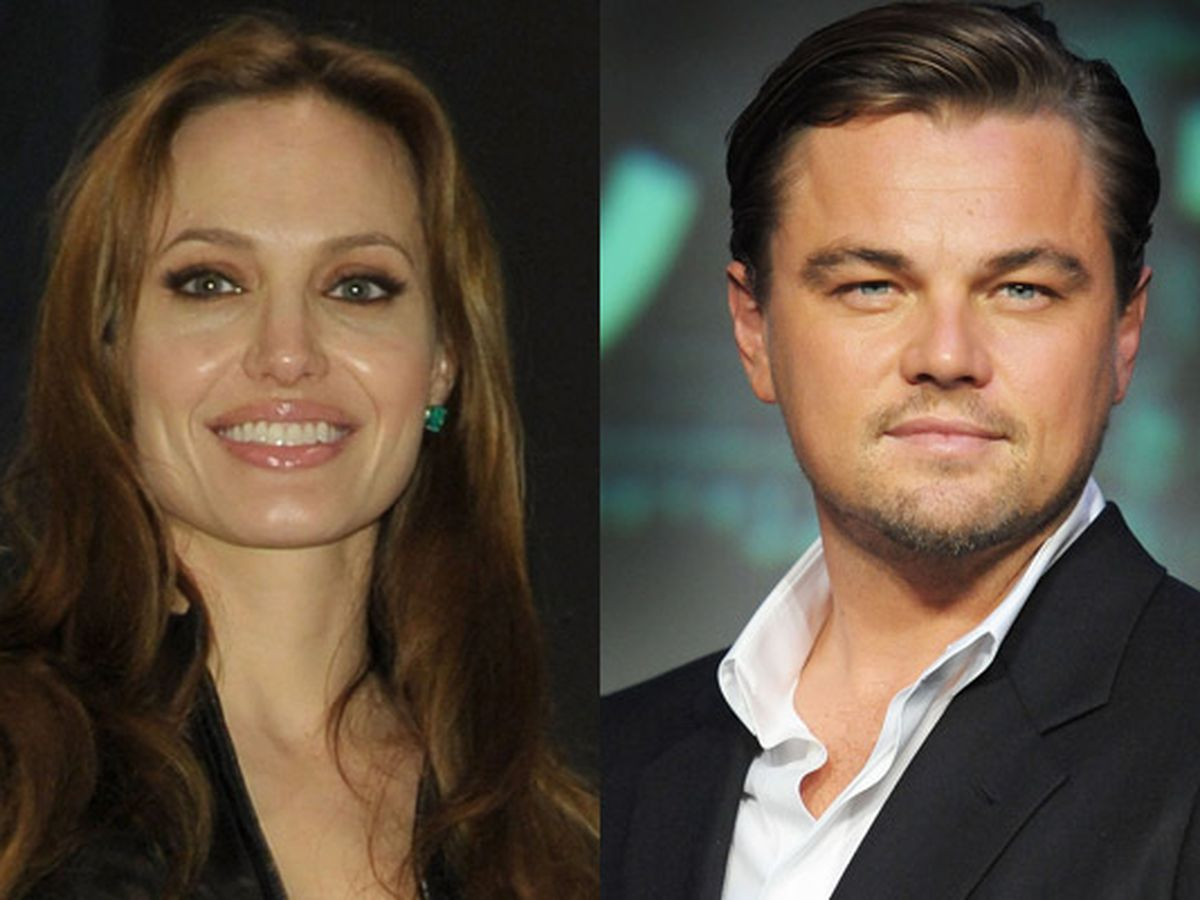

In [10]:
img= cv2.imread('/content/drive/MyDrive/project_face_recog/test/test_images.jpg')

display(img)

In [20]:
def pipeline_model(path):
  img=cv2.imread(path)
  image=img.copy()
  h,w=img.shape[:2]

  img_blob = cv2.dnn.blobFromImage(img,1,(300,300),(104,177,123),False,False)

  face_detector_model.setInput(img_blob)
  detections=face_detector_model.forward()
  #results
  ml_results = dict(face_detect_score=[],
                    face_name=[],
                    face_name_score=[],
                    emotion_name=[],
                    emotion_name_score=[],
                    count=[])
  count=1
  if len(detections)>0:
    for i, confidence in enumerate(detections[0,0,:,2]):
      if confidence>0.5:
        box=detections[0,0,i,3:7]
        box=box*np.array([w,h,w,h])
        startx,starty,endx,endy=box.astype(int)

        cv2.rectangle(image,(startx,starty),(endx,endy),(0,255,0),2)

        #feature extraction
        face_roi=img[starty:endy,startx:endx]
        face_blob=cv2.dnn.blobFromImage(face_roi,1/255,(96,96),(0,0,0),True,True)
        face_feature_model.setInput(face_blob)
        vectors=face_feature_model.forward()

        #recognition and emotion
        face_name=face_recognition_model.predict(vectors)[0]
        face_score=face_recognition_model.predict_proba(vectors).max()

        text_face=f'{face_name} : {int(100*(face_score))}'

        emotion_name=emotion_recognition_model.predict(vectors)[0]
        emotion_score=emotion_recognition_model.predict_proba(vectors).max()
        
        text_emotion=f'{emotion_name} : {int(100*(emotion_score))}'
        cv2.putText(image,text_face,(startx,starty),cv2.FONT_HERSHEY_PLAIN,2,(255,255,255),3)
        cv2.putText(image,text_emotion,(startx,endy),cv2.FONT_HERSHEY_PLAIN,2,(255,255,255),3)

        ml_results['count'].append(count)
        ml_results['face_detect_score'].append(confidence)
        ml_results['face_name'].append(face_name)
        ml_results['face_name_score'].append(face_score)
        ml_results['emotion_name'].append(emotion_name)
        ml_results['emotion_name_score'] .append (emotion_score)

        count+=1
  return ml_results

      



In [21]:
results = pipeline_model('/content/drive/MyDrive/project_face_recog/test/salman_amir.jpg')
results

{'count': [1, 2],
 'emotion_name': ['happy', 'neutral'],
 'emotion_name_score': [0.28137774395203174, 0.19618820340012913],
 'face_detect_score': [0.9446319, 0.87184036],
 'face_name': ['Salman Khan', 'Aamir Khan'],
 'face_name_score': [0.6979333788694763, 0.489105575266509]}

In [22]:
results = pipeline_model('/content/drive/MyDrive/project_face_recog/test/scalertt_robert.jpg')
results

{'count': [1, 2],
 'emotion_name': ['surprise', 'angry'],
 'emotion_name_score': [0.22968567426779818, 0.27656629016911255],
 'face_detect_score': [0.99362564, 0.99279],
 'face_name': ['Scarlett Johansson', 'Salman Khan'],
 'face_name_score': [0.27433443051814865, 0.3115197583263531]}